## Week3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!


In [4]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [5]:
df_q1 = df.copy()

# "연령대코드(5세단위)" column의 값을 map()을 통해 age_code의 값으로 바꿈
df_q1["연령대코드(5세단위)"] = df_q1["연령대코드(5세단위)"].map(age_code)

# "연령대코드(5세단위)" column 이름을 "연령대"로 변경
df_q1 = df_q1.rename(columns={"연령대코드(5세단위)": "연령대"})

# 연령대에 따른 허리둘레의 통계값 구함
pd.pivot_table(df_q1, index="연령대", values="허리둘레", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

<Axes: >

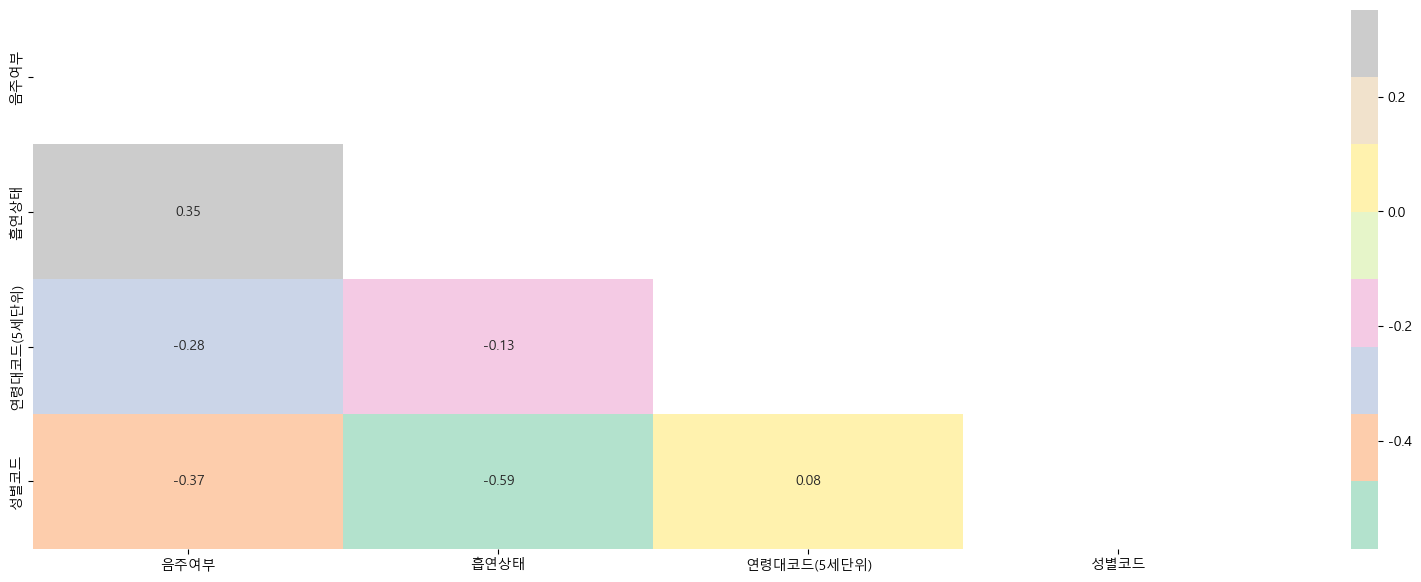

In [40]:
q2_columns=["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
df_q2 = df[q2_columns]
# corr(): 상관계수 계산
df_corr = df_q2.corr()

# mask: 매트릭스의 대각선 아래만 표시
mask = np.triu(np.ones_like(df_corr, dtype=bool))
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Pastel2", mask=mask)

Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

* replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 
* 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화(막대그래프) 해주세요!

In [42]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [74]:
df_q3 = df.copy()

# 흡연상태와 음주여부의 column값을 각각 smoke, drink의 값으로 매핑(map)
df_q3["흡연상태"] = df_q3["흡연상태"].map(smoke)
df_q3["음주여부"] = df_q3["음주여부"].map(drink)

# 흡연상태, 음주여부 column 이름을 각각 흡연, 음주로 변경
df_q3 = df_q3.rename(columns={"흡연상태": "흡연", "음주여부": "음주"})

# 음주와 흡연에 대한 교차 테이블 (두 column의 데이터의 수를 교차분석)
pd.crosstab(df_q3["음주"], df_q3["흡연"])

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<Axes: xlabel='흡연', ylabel='count'>

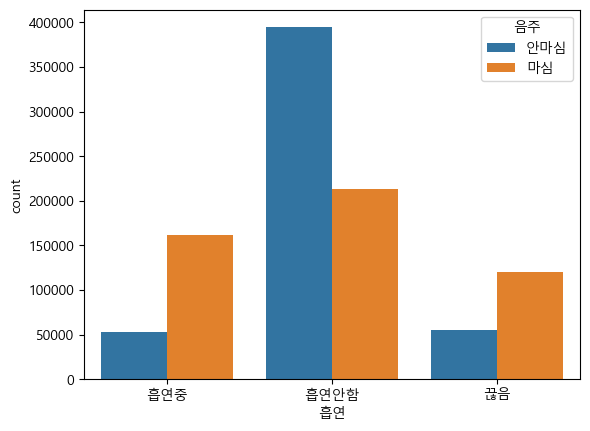

In [78]:
# "흡연상태"에 따른 데이터 수를 "음주여부"로 색상을 구분한 막대그래프로 표현
sns.countplot(x="흡연", data=df_q3, hue="음주")

Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화
* 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화 (이때 120Kg도 포함)
* 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

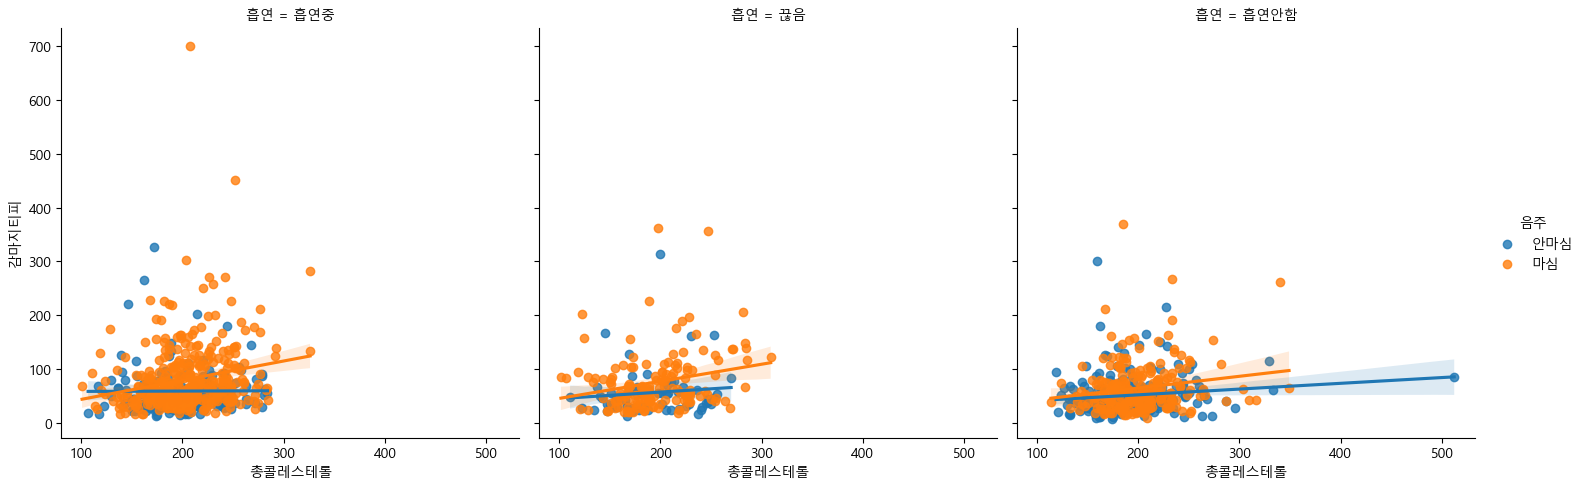

In [95]:
# 체중이 120이상인 데이터만 모음
df_q4 = df_q3[df_q3["체중(5Kg 단위)"] >= 120]
df_q4["체중(5Kg 단위)"]

# 총콜레스테롤에 따른 감마지티피 값을 흡연과 음주로 나누어 산점도로 시각화
sns.lmplot(data=df_q4, x="총콜레스테롤", y="감마지티피", hue="음주", col="흡연")

Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화(서브플롯) 해주세요!
 
* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기
* 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력 구하기


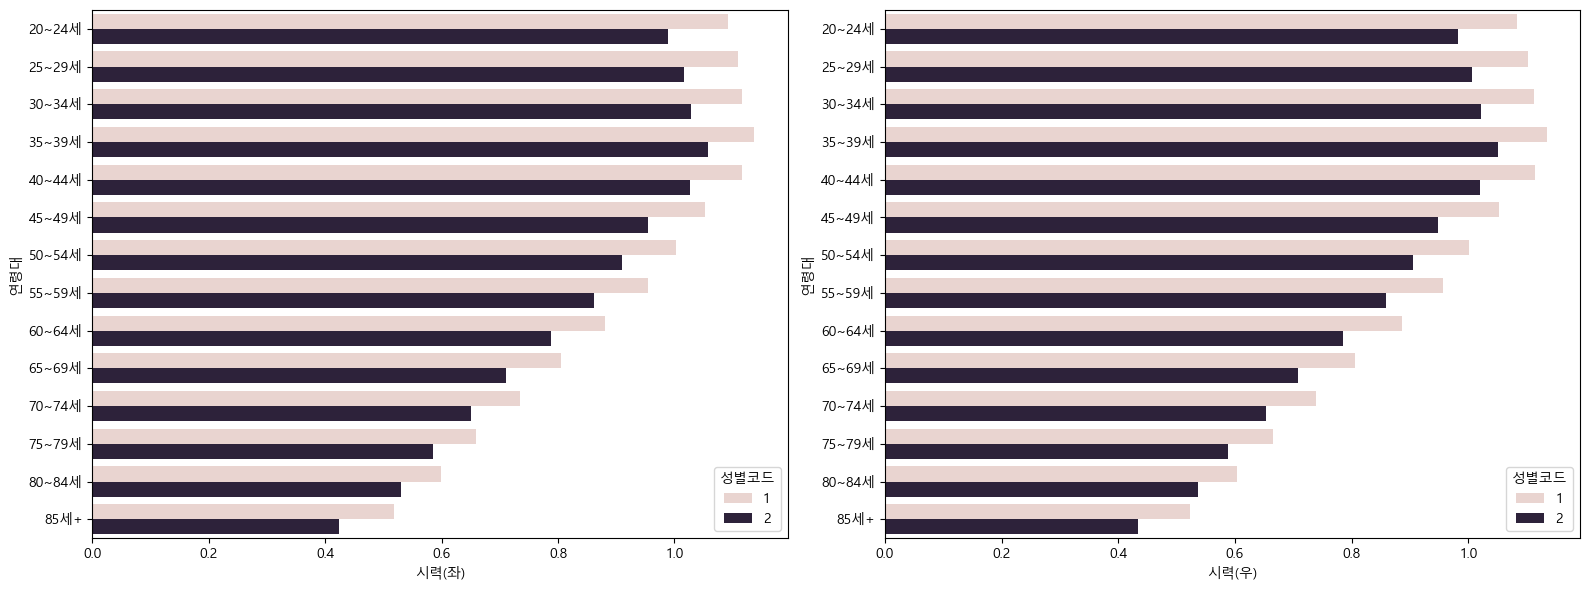

In [153]:
# 실명(시력이 9.9)인 데이터만 제외
df_q5 = df_q1[(df_q1["시력(좌)"] < 9.9) & (df_q1["시력(우)"] < 9.9)]
# 연령대별로 정렬
df_q5 = df_q5.sort_values("연령대")

# 그래프 사이즈 조절
plt.figure(figsize=(16, 6))

# subplot 설정
plt.subplot(1, 2, 1)
# 왼쪽시력에 따른 연령대를 성별코드로 나눈 막대그래프로 표현
sns.barplot(data=df_q5, x="시력(좌)", y="연령대", hue="성별코드", errorbar=None)
plt.subplot(1, 2, 2)
sns.barplot(data=df_q5, x="시력(우)", y="연령대", hue="성별코드", errorbar=None)

# 서브플롯 간의 겹침을 방지하기 위해 사용
plt.tight_layout()  
plt.show()